ECON 294A Final Project Skyler Scheetz

Data cleaning:

In [2]:
import pandas as pd

# Load the dataset
file_path = '/Users/skylerscheetz/Library/Mobile Documents/com~apple~CloudDocs/UCSC/spring 24/econ 294a/assignment 2/finalprojectdataecon294a.csv'
data = pd.read_csv(file_path)



# Pivot the cleaned dataframe
pivoted_data = data.pivot(index='Year', columns='Series ID', values='Value')

# Reset the index to make 'Year' a column
pivoted_data.reset_index(inplace=True)

data_cleaned1 = pivoted_data.dropna()


# Save the transformed dataframe to a new CSV file
output_file_path = '/Users/skylerscheetz/Library/Mobile Documents/com~apple~CloudDocs/UCSC/spring 24/econ 294a/assignment 2/econ294finaldataclean.csv'
data_cleaned1.to_csv(output_file_path, index=False)


In [4]:
# List of columns to check
columns_to_check = ["15-19", "20-24", "25-34", "45-54", "55-64", "65-74", "employed", "men", "women"]

# Create the 'hour' indicator variable
data_cleaned1['hour'] = (data_cleaned1[columns_to_check] > 1.0).any(axis=1).astype(int)


/var/folders/1t/dtt_p9js69s_cbyygbthqd8h0000gn/T/ipykernel_90372/2696925172.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned1['hour'] = (data_cleaned1[columns_to_check] > 1.0).any(axis=1).astype(int)


In [6]:
# Save the transformed dataframe to a new CSV file
output_file_path = '/Users/skylerscheetz/Library/Mobile Documents/com~apple~CloudDocs/UCSC/spring 24/econ 294a/assignment 2/econ294finaldataclean.csv'
data_cleaned1.to_csv(output_file_path, index=False)

Analysis:

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

/var/folders/1t/dtt_p9js69s_cbyygbthqd8h0000gn/T/ipykernel_90372/1378919148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned1['hour'] = (data_cleaned1[columns_to_check] > 1.0).any(axis=1).astype(int)
/Users/skylerscheetz/.pyenv/versions/3.9.18/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


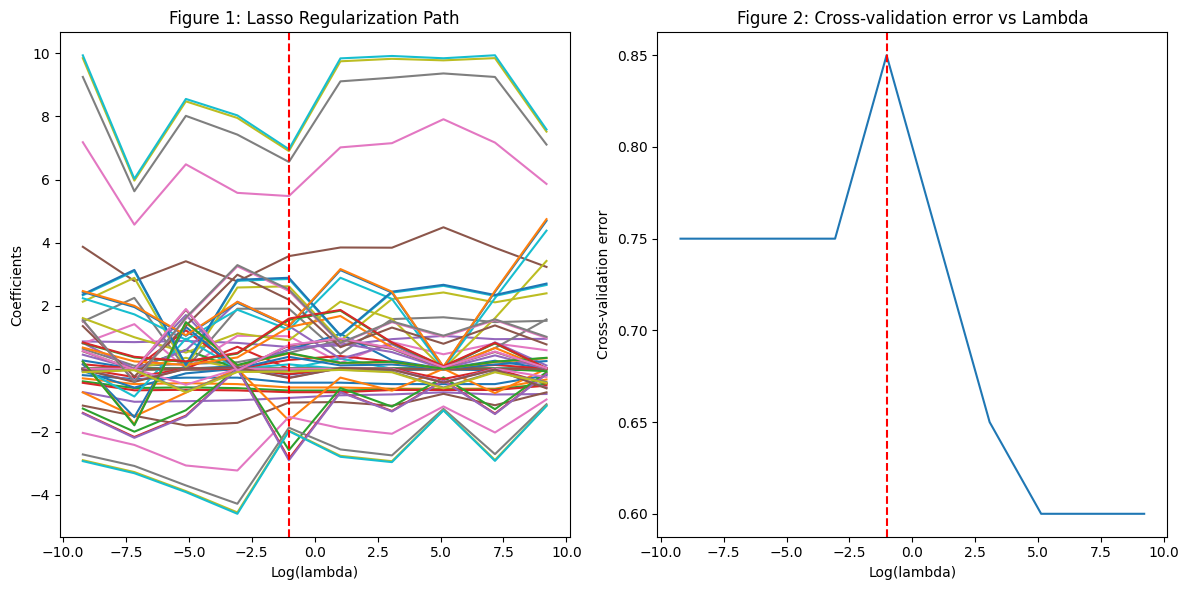

Number of regressors: 10
Number of nonzero regressors: 1
Nonzero coefficients:
Series ID
15-19    1.003819
dtype: float64
Strong predictors:
Series ID
15-19    1.003819
dtype: float64


In [8]:
# Create the 'hour' indicator variable
data_cleaned1['hour'] = (data_cleaned1[columns_to_check] > 1.0).any(axis=1).astype(int)

# Split the data into features and target variable
X = data_cleaned1.drop(columns=['Year', 'hour'])
y = data_cleaned1['hour']

# Set number of splits for cross-validation
n_splits = 10

# Standardize the data and apply logistic regression with lasso regularization
model = make_pipeline(
    StandardScaler(),
    LogisticRegressionCV(
        cv=StratifiedKFold(n_splits=n_splits),
        penalty='l1',
        solver='saga',
        max_iter=10000,
        random_state=0
    )
)

# Fit the model
model.fit(X, y)

# Extract the logistic regression model
logit = model.named_steps['logisticregressioncv']

# Extract the coefficients for each lambda
coefs = logit.coefs_paths_[1]

# Plotting the regularization path and cross-validation error
mean_scores = np.mean(logit.scores_[1], axis=0)
lambdas = logit.Cs_

plt.figure(figsize=(12, 6))

# Regularization path plot
plt.subplot(1, 2, 1)
for i in range(coefs.shape[1]):
    plt.plot(np.log(lambdas), coefs[:, i, :], label=X.columns[i])
plt.axvline(np.log(logit.C_[0]), color='r', linestyle='--')
plt.xlabel('Log(lambda)')
plt.ylabel('Coefficients')
plt.title('Figure 1: Lasso Regularization Path')

# Cross-validation error plot
plt.subplot(1, 2, 2)
plt.plot(np.log(lambdas), mean_scores)
plt.axvline(np.log(logit.C_[0]), color='r', linestyle='--')
plt.xlabel('Log(lambda)')
plt.ylabel('Cross-validation error')
plt.title('Figure 2: Cross-validation error vs Lambda')

plt.tight_layout()
plt.show()

# Number of regressors and nonzero regressors
num_regressors = X.shape[1]
num_nonzero_regressors = np.sum(logit.coef_ != 0)
print(f"Number of regressors: {num_regressors}")
print(f"Number of nonzero regressors: {num_nonzero_regressors}")

# Nonzero coefficients
nonzero_coefs = pd.Series(logit.coef_.flatten(), index=X.columns)
nonzero_coefs = nonzero_coefs[nonzero_coefs != 0]
print("Nonzero coefficients:")
print(nonzero_coefs)

# Strong predictors
strong_predictors = nonzero_coefs[nonzero_coefs.abs() > 0.1]  # Example threshold for "strong"
print("Strong predictors:")
print(strong_predictors)

A logit model is estimated with lasso regularization and penalty obtained from 10-fold cross-validation. A plot of the lasso regularization path and a plot of the cross-validation error against lambda have both been provided. The optimal penalty marked on the regularization path plot is small due to its left position on the horizontal axis. Since the line of minimum deviance is located further toward the left, the lambda value is smaller than if it were located further toward the right, generating a lower penalty and more complex model in general. In comparison to the other lambdas, I would call this model complex. This is due to the fact that in the regularization plot, it appears to include many more regressors (more complex) compared to other lambdas toward the right that zero-out more regressors (less complex).


What is unusual about the shape of the cross-validation error plot is that typically, a more “U” shaped curve is observed (a parabola). On the rightmost side of the graph, the penalty value is usually at its greatest resulting in a model of low complexity (null model). Generally, the bias is high and the variance is low here, and their sum results in a measure of deviance that is high. This is not seen on in the figure above as the measure of deviance decreases on the right side of the graph. Usually, the leftmost side of the graph (low penalty) is associated with a high measure of deviance as well. This is due to a lower penalty that generates a model of higher complexity (OLS) that would over-fit to the data. Generally, this leftmost side is associated with high variance and low bias, and their sum would generate a high measure of deviance. Instead in the plot above, a lower penalty is associated with a medium level of deviance. In the middle portion of the graph with this value of lambda (penalty), the minimum measurement of deviance is achieved. This is unusual compared to the more typical “U” shaped curve (parabola) where the deviance is minimized near the middle of the horizontal axis (measure of lambda).
Usually, a high value of lambda (null model) generates a high measure of deviance. This is due to the a model that under-fits the data; the bias is high, the variance is low, and their sum is large. Their sum is depicted on the plot as the measure of deviance decreases toward the right. Typically, on the leftmost side of the graph, a low penalty generates a complex model (OLS) that over-fits to the data. Usually, this results in high variance and low bias that sum to a high measure of deviance. However, the plot above demonstrates that this over-fitting is occurring somewhat here when the value of lambda is low on the left-side of the graph. Over-fitting can be occurring and is depicted by the measure of deviance that somewhat increased toward the left as the value of lambda (penalty) shrinks. Though, under-fitting may not be as substantial when the value of lambda is at its greatest (null model).
It was observed that there were only 1 regressor in the model to choose from. The number of nonzero regressors chosen by lasso under the optimal penalty is 1, and therefore, this appeared to be a model of relatively low complexity due to using only 10% of the possible regressors. Over-fitting must not be occurring while the value of lambda is low due to its choice of 1 out of 10 regressors. Usually while the value of lambda (penalty) is low, a complex model over-fits to the data, but in this context, a low value of lambda is not associated with a complex model over-fitting to the data.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold

/Users/skylerscheetz/.pyenv/versions/3.9.18/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


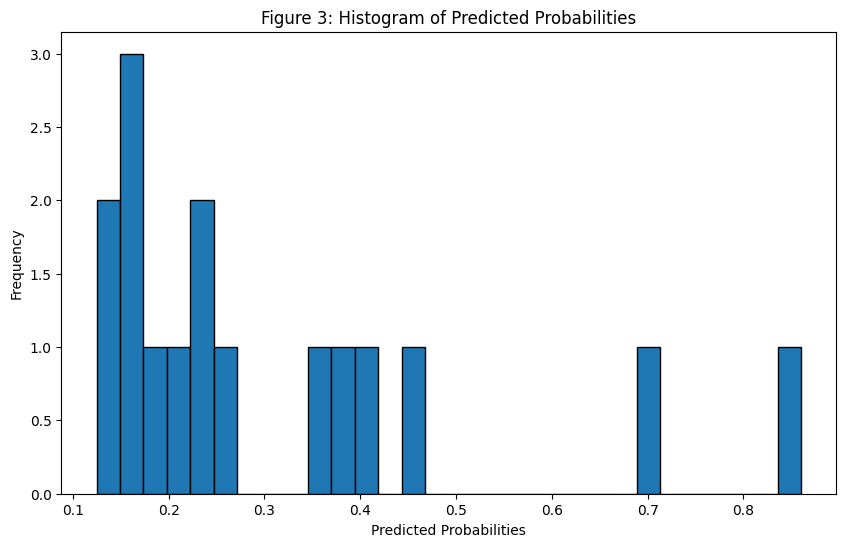

In [47]:
# Set number of splits for cross-validation
n_splits = 10

# Standardize the data and apply logistic regression with lasso regularization
model = make_pipeline(
    StandardScaler(),
    LogisticRegressionCV(
        cv=StratifiedKFold(n_splits=n_splits),
        penalty='l1',
        solver='saga',
        max_iter=10000
    )
)

# Fit the model
model.fit(X, y)

# Predict probabilities for each observation in the dataset
predicted_probabilities = model.predict_proba(X)[:, 1]

# Plot the histogram of predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(predicted_probabilities, bins=30, edgecolor='k')
plt.title('Figure 3: Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.show()


The results of the predicted probabilities in the histogram plot demonstrate that the majority of predicted probabilities falls in one mode. Many predicted probabilities fall in the lower specification of probabilities 0.1 to 0.2 while fewer other predicted probabilities fall in the range specification of probabilities 0.4 to 0.9. Therefore, the shape of the histogram has one peak (mode); this peak is on the lower end near probability 0 but appears to have a large tail toward the right. The algorithm then demonstrates that it is only somewhat certain about the category of each observation. Predicted probabilities that fall on the zero category are predicted that the individual had less than one hour per day on average for leisurely computer time while predicted probabilities that fall on the 1 category are predicted that the individual had at least one hour per day on average for leisurely computer time. These probability predictions do not appear to be certain, and there is some uncertainty involved.

/var/folders/1t/dtt_p9js69s_cbyygbthqd8h0000gn/T/ipykernel_79825/1334401366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned1['hour'] = (data_cleaned1[columns_to_check] > 1.0).any(axis=1).astype(int)


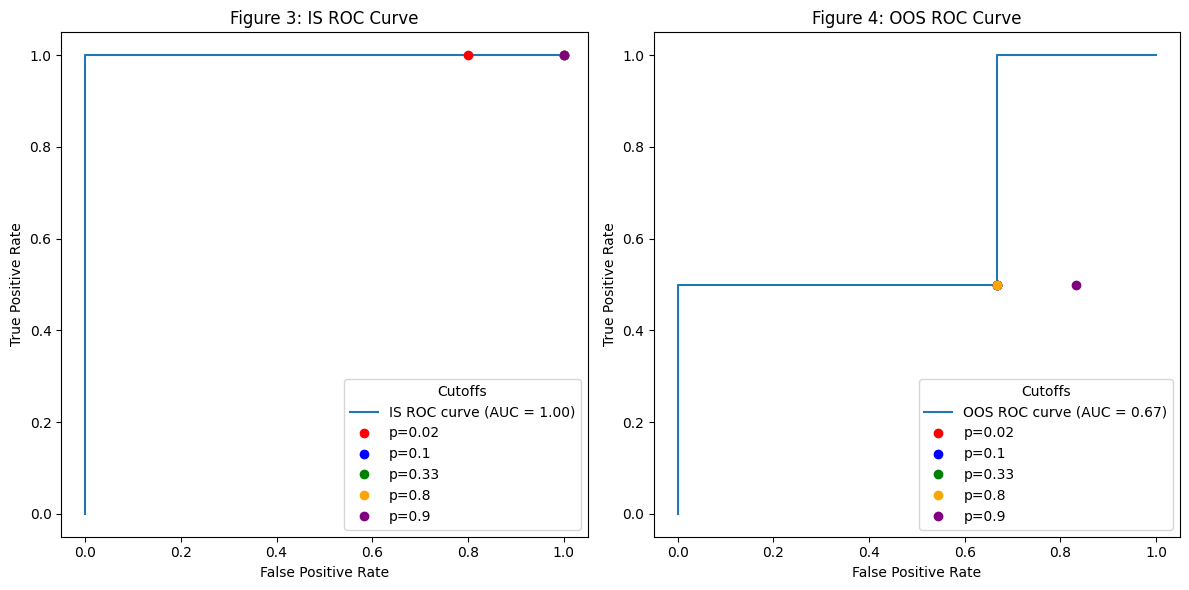

In [43]:

columns_to_check = ["15-19", "20-24", "25-34", "45-54", "55-64", "65-74", "employed", "men", "women"]

# Create the 'hour' indicator variable
data_cleaned1['hour'] = (data_cleaned1[columns_to_check] > 1.0).any(axis=1).astype(int)

# Split the data into features and target variable
X = data_cleaned1.drop(columns=['Year', 'hour'])
y = data_cleaned1['hour']

# Set seed for reproducibility
np.random.seed(0)

# Split the data into in-sample (IS) and out-of-sample (OOS) sets
n = len(data_cleaned1)
test_indices = np.random.choice(n, size=n // 2, replace=False)
train_indices = np.setdiff1d(np.arange(n), test_indices)

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

# Determine the number of splits for cross-validation
n_splits = min(5, np.bincount(y_train).min())

# Standardize the data and apply logistic regression with lasso regularization
model = make_pipeline(
    StandardScaler(),
    LogisticRegressionCV(
        cv=StratifiedKFold(n_splits=n_splits),
        penalty='l1',
        solver='saga',
        max_iter=10000
    )
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict probabilities
pred_train = model.predict_proba(X_train)[:, 1]
pred_test = model.predict_proba(X_test)[:, 1]

# Compute ROC curves and AUC
fpr_train, tpr_train, _ = roc_curve(y_train, pred_train)
fpr_test, tpr_test, _ = roc_curve(y_test, pred_test)
auc_train = roc_auc_score(y_train, pred_train)
auc_test = roc_auc_score(y_test, pred_test)

# Plot ROC curves
plt.figure(figsize=(12, 6))

# IS ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, label=f'IS ROC curve (AUC = {auc_train:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 4: IS ROC Curve')
plt.legend(loc='lower right')

# OOS ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, label=f'OOS ROC curve (AUC = {auc_test:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 5: OOS ROC Curve')
plt.legend(loc='lower right')

# Cutoff values
cutoffs = [0.02, 0.1, 0.33, 0.8, 0.9]
colors = ['red', 'blue', 'green', 'orange', 'purple']

for cutoff, color in zip(cutoffs, colors):
    # IS cutoff points
    classif_rule_train = (pred_train > cutoff)
    sensitivity_train = np.mean(classif_rule_train[y_train == 1])
    specificity_train = 1 - np.mean((1 - classif_rule_train)[y_train == 0])
    plt.subplot(1, 2, 1)
    plt.plot(1 - specificity_train, sensitivity_train, 'o', color=color, label=f'p={cutoff}')

    # OOS cutoff points
    classif_rule_test = (pred_test > cutoff)
    sensitivity_test = np.mean(classif_rule_test[y_test == 1])
    specificity_test = 1 - np.mean((1 - classif_rule_test)[y_test == 0])
    plt.subplot(1, 2, 2)
    plt.plot(1 - specificity_test, sensitivity_test, 'o', color=color, label=f'p={cutoff}')

plt.subplot(1, 2, 1)
plt.legend(loc='lower right', title='Cutoffs')

plt.subplot(1, 2, 2)
plt.legend(loc='lower right', title='Cutoffs')

plt.tight_layout()
plt.show()

The IS ROC and OOS ROC curves relate to the previous histogram due to the fact that it demonstrates the level of certainty with such predictions. This illustrated trade-off between sensitivity and specificity demonstrates that proportion of positives that were correctly classified as “positive” as well as the proportion of negatives that were correctly classified as “negative” are both nearly 100% for the in-sample predictoins. There is virtually no trade-off between the proportion of correctly classified positives and the proportion of correctly classified negatives. However, the proportion of positives that were correctly classified as “positive” as well as the proportion of negatives that were correctly classified as “negative” are not both nearly 100% for the out-of-sample predictoins. This result relates to the histogram  because the histogram and the OOS ROC curves both indicate that the algorithm is only somewhat certain about the classification of each observation. The shape of the histogram has one peak (mode) on the lower end near probability zero with a larger tail toward probability one. The algorithm then demonstrates that it is only somewhat certain about the category of each observation and some uncertainty is involved.


The analysis showed that the strongest predicor for whether or not an individual reporting that they have more than one hour per day on average for leisurely computer time is the characteristic of younger ages from years 15 to 19. I would have some reservations utilizing this algorithm due to the fact that only using the individual's age is not a fair means to determine if the individual reported to have more than one hour per day on average for leisurely computer time. It would be inappropriate to assume that the only important factor that determines this computer use is the individual's age. 